Code assimilated from https://github.com/OceanParcels/Lagrangian_diags/

In [1]:
import time

print(time.ctime(time.time()))

Wed Jun 28 16:34:42 2023


Import packages

In [26]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as features
from matplotlib import colors
import sys

In [3]:
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, xarray, scipy

Software versions
Python 3.8.11 64bit [GCC 7.5.0]
IPython 7.27.0
OS Linux 4.18.0 477.13.1.el8_8.x86_64 x86_64 with glibc2.17
numpy 1.20.3
xarray 0.19.0
scipy 1.7.1
Wed Jun 28 16:35:11 2023 CEST

Loading data

In [4]:
home_folder = '/nethome/manra003/Lagrangian_diags/'
output_folder = home_folder+ 'outputs/ftle/'

In [5]:
Td=15

In [6]:
sys.path.insert(0, home_folder + "Diagnostics/Functions/")

In [17]:
import FTLE

In [10]:

ds = xr.open_dataset(home_folder + 'Simulations/toy_data_01.nc')
ds

<xarray.Dataset>
Dimensions:     (traj: 144, obs: 121)
Dimensions without coordinates: traj, obs
Data variables:
    trajectory  (traj, obs) float64 ...
    time        (traj, obs) datetime64[ns] ...
    lat         (traj, obs) float32 ...
    lon         (traj, obs) float32 ...
    z           (traj, obs) float32 ...
    U           (traj, obs) float32 ...
    V           (traj, obs) float32 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.1.dev20+g92f2fb90
    parcels_mesh:           spherical

In [16]:
coords0, coords1 = 12, 12

# # initial position
# x0 = np.reshape(ds['lon'][:,0].data, (grid_lons.shape[0], grid_lons.shape[1]))
# y0 = np.reshape(ds['lat'][:,0].data, (grid_lons.shape[0], grid_lons.shape[1])) 

# # final position
# x1 = np.reshape(ds['lon'][:,-1].data, (grid_lons.shape[0], grid_lons.shape[1]))
# y1 = np.reshape(ds['lat'][:,-1].data, (grid_lons.shape[0], grid_lons.shape[1]))

# initial position
x0 = np.reshape(ds['lon'][:,0].data, (coords0, coords1))
y0 = np.reshape(ds['lat'][:,0].data, (coords0, coords1)) 

# final position
x1 = np.reshape(ds['lon'][:,-1].data, (coords0, coords1))
y1 = np.reshape(ds['lat'][:,-1].data, (coords0, coords1))

In [20]:
ftle_array = FTLE.compute_ftle(x0,y0,x1,y1, Td)

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan],
       [       nan, 0.20557927, 0.23722558, 0.24224663, 0.2332923 ,
        0.26250443, 0.26825082, 0.23352517, 0.21216045, 0.19130948,
        0.18429059,        nan],
       [       nan, 0.23911542, 0.24456085, 0.23687112, 0.23761386,
        0.2404062 , 0.25018385, 0.2298693 , 0.20807023, 0.2105062 ,
        0.13224818,        nan],
       [       nan, 0.23350815, 0.23169439, 0.25370327, 0.23608686,
        0.20361826, 0.25968882, 0.27300897, 0.19975345, 0.23276708,
        0.22809938,        nan],
       [       nan, 0.21924575, 0.21020657, 0.21062104, 0.15477084,
        0.1587659 , 0.2160384 , 0.2690082 , 0.25315166, 0.24860154,
        0.23940046,        nan],
       [       nan, 0.24471931, 0.25437996, 0.20603499, 0.13078187,
        0.16712418, 0.20256187, 0.20863578, 0.17994268, 0.2414588 ,
        0.22161287,

Plot the ftle on the map

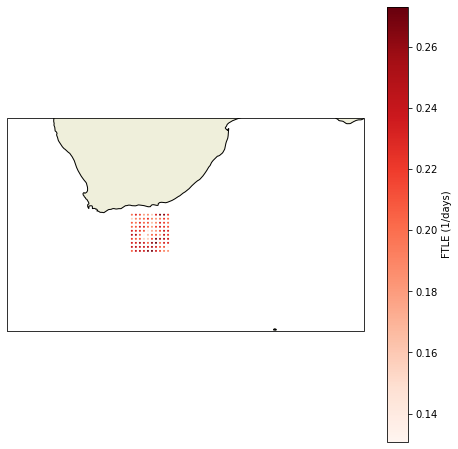

In [30]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(features.LAND)
ax.add_feature(features.COASTLINE)
plt.scatter(ds['lon'][:,0], ds['lat'][:,0], c=ftle_array, cmap='Reds', s=1)
ax.set_xlim(10, 47)
ax.set_ylim(-47, -25)
cbar = plt.colorbar()
cbar.set_label("FTLE (1/days)")
